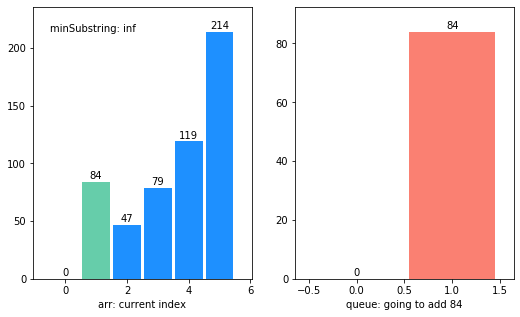

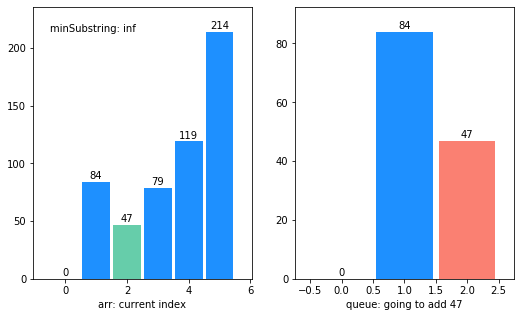

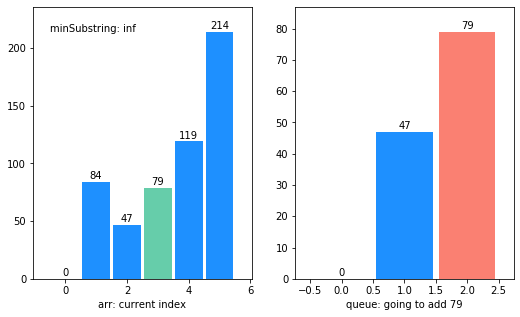

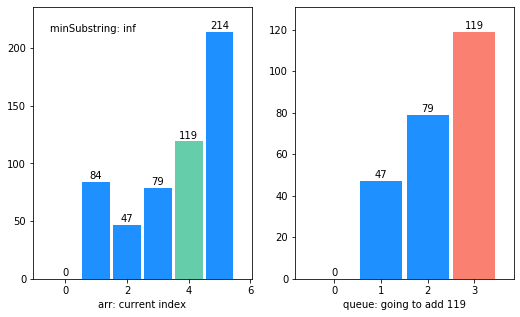

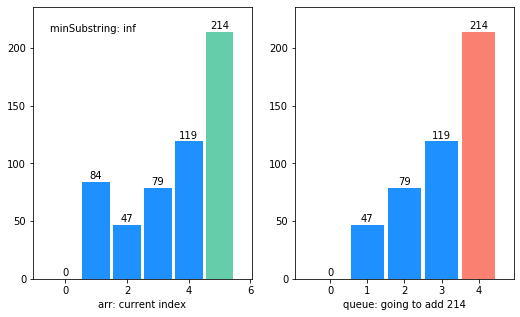

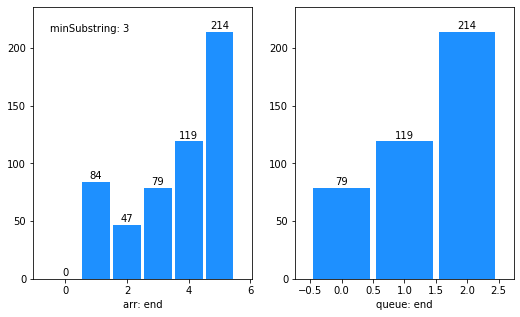

In [36]:
import collections
import matplotlib.pyplot as plt

c_grey = 'silver'
c_red = 'salmon'
c_blue = 'dodgerblue'
c_green = 'mediumaquamarine'
c_yellow = 'gold'

def get_colors(vals):
    cols=pltcolor(x)

def label_maker(vals, plt):
    for i in range(len(vals)):
        y = vals[i] + 1.5
        if vals[i] < 0:
            y = vals[i] - 4
        plt.text(x = i - 0.1, y = y, s = vals[i], size = 10)

def show_bar_chart2(vals, colors):
    ind = [i for i in range(len(vals))]
    plt.figure(num=None, figsize=(7, 6))
    plt.bar(ind, vals, width = 0.85, color=colors)
    plt.xticks(ind) 
    label_maker(vals, plt) 
    plt.show()

def show_bar_chart(vals):
    ind = [i for i in range(len(vals))]
    plt.bar(ind,vals,tick_label=ind)
    plt.show()

    
def make_prefix_arr(vals):
    pre = [0]
    for val in vals:
        pre.append(pre[-1] + val)
    return pre[1:]

def get_colors_with_highlighted_index(vals, indexes_to_color, ind_to_color_map):
    colors = []
    for ind in range(len(vals)):
        if ind in indexes_to_color:
            colors.append(ind_to_color_map[ind])
        else:
            colors.append(c_blue)
    return colors
    
def item_str(i):
    return str(i[0]) + '; ' + str(i[1])
  
    
def l(vals, txt, plt):
    for i in range(len(vals)):
        if vals[i] == 0:
            continue
        y = vals[i] + 1
        if vals[i] < 0:
            y = vals[i] - 4
        plt.text(x = i, y = y, s = vals[i], size = 10)
      
    
def l2(xs,ys,plt):
    for x,y in zip(xs,ys):

        label = y
        
        z = 3
        if y < 0: 
            z = -15
            
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,z), ha='center')


def chart_d(ar,ind,plt,t):
    c=get_colors_with_highlighted_index(ar,[ind],{ind:c_blue})
    ind = [i for i in range(len(vals))]
    v = [i[1] for i in list(vals)]
    p.margins(0.15)
    p.set_xlabel(t)
    p.bar(ind, v, width = 0.9, color=colors)
    l2(ind, v, p)

    
def chart_l(ar,ind,p,t,res):
    c=get_colors_with_highlighted_index(ar,[ind],{ind:c_green})
    ind = [i for i in range(len(ar))]
    p.text(-0.5,max(ar),'minSubstring: ' + str(res))
    p.margins(0.1)
    p.set_xlabel(t)
    p.bar(ind, ar, width = 0.9, color=c)
    l2(ind, ar, p)
        
        
def before_chart(subplt,d,i,cur):
    if cur is not None:
        d.append([i, cur])
    ind_to_color_map = {i:c_red}
    ind = [i for i in range(len(d))]
    vals = [i[1] for i in list(d)]
    colors = get_colors_with_highlighted_index(vals,[i],ind_to_color_map)
    subplt.bar(ind, vals, width = 0.9, color=colors)
    subplt.margins(0.1)
    if cur is not None:
        subplt.set_xlabel('queue: going to add ' + str(cur))
    else:
        subplt.set_xlabel('queue: end')
    l2(ind, vals, subplt)
    
class solution:
    def p(self, A, K):
        
        d = collections.deque([[0, 0]])
        res, cur = float('inf'), 0
        
        B = [0]
        for a in A: B.append(B[-1] + a)
        
        pic_count=1
        
        for i, a in enumerate(A):
            
            cur += a
            
            f = plt.figure(figsize=(18,5))
            
            chart_l(B, i + 1, f.add_subplot(141), 'arr: current index', res)
            
            before_chart(f.add_subplot(142), d, len(d), cur)
            
            while d and cur <= d[-1][1]:
                d.pop()
                
#             chart(d, len(d) - 1, f.add_subplot(142), 'popLast')

            while d and cur - d[0][1] >= K:
                res = min(res, i + 1 - d.popleft()[0])
            
#             chart(d, len(d) - 1, f.add_subplot(143), 'popFirst')

            d.append([i + 1, cur])
    
#             chart(d, -1, f.add_subplot(144), 'append ' + str(cur))

            plt.show()
            f.savefig('862_' + str(pic_count) + '.png', bbox_inches='tight')
            pic_count+=1
            
        f = plt.figure(figsize=(18,5))
        chart_l(B, -1, f.add_subplot(141), 'arr: end', (res if res < float('inf') else -1))
        before_chart(f.add_subplot(142), d, -1, None)
        f.savefig('862_' + str(pic_count) + '.png', bbox_inches='tight')
        
#         return res if res < float('inf') else -1

    
s = solution()
vals = [84,-37,32,40,95]
s.p(vals, 167)